In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [ ]:
data=pd.read_csv('dataset_comb.csv')

In [ ]:
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine


In [ ]:
y=data['Class']
data.drop(['Class','id'],axis=1,inplace=True)

In [ ]:
k_fold = KFold(shuffle=True,n_splits=7)

In [ ]:
clf = LinearDiscriminantAnalysis()
arr1 = cross_val_score(estimator=clf, X=data, y=y, cv=k_fold)

clf = Perceptron(tol=1e-3, random_state=0)
arr2 = cross_val_score(estimator=clf, X=data, y=y, cv=k_fold)

clf = GaussianNB()
arr3 = cross_val_score(estimator=clf, X=data, y=y, cv=k_fold)

clf = LogisticRegression(max_iter=10000)
arr4 = cross_val_score(estimator=clf, X=data, y=y, cv=k_fold)

clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
arr5 = cross_val_score(estimator=clf, X=data, y=y, cv=k_fold)

clf = svm.SVC()
arr6 = cross_val_score(estimator=clf, X=data, y=y, cv=k_fold)

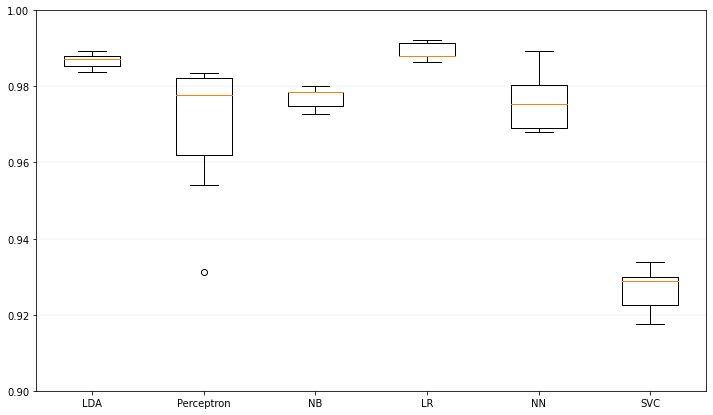

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_ylim(0.9, 1)
plt.boxplot([arr1,arr2,arr3,arr4,arr5,arr6])

plt.xticks([1, 2, 3, 4, 5, 6], ['LDA', 'Perceptron', 'NB', 'LR', 'NN', 'SVC'])

plt.show()